In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #Linear Regressor
from sklearn.datasets import load_iris
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Data Loaded

data = pd.read_csv('/Users/Admin/Documents/Python Scripts/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Checking Null Values

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
# Checking if any of the record has rating > 5

data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [5]:
# Now checking if 1.9 is the real category or its a dummy data

data['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [6]:
# So its obvious that 1.9 category and rating above doesn't make sense, so drop this record

rec = data[data['Category'] == '1.9'].index
data = data.drop(rec)

In [7]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# Dropping the columns which have no impact

data = data.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9366 non-null   float64
 2   Reviews         10840 non-null  object 
 3   Size            10840 non-null  object 
 4   Installs        10840 non-null  object 
 5   Type            10839 non-null  object 
 6   Price           10840 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 846.9+ KB


In [10]:
data.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [11]:
# Making a copy of data

train_data = data.copy()

In [12]:
# Cleaning "Price" column

train_data['Price'] = train_data['Price'].apply(lambda x : x.strip('$'))

# Cleaning "Installs" column

train_data['Installs'] = train_data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [13]:
# Converting all these to float

train_data['Price'] = train_data['Price'].astype(float)
train_data['Installs'] = train_data['Installs'].astype(float)
train_data['Reviews'] = train_data['Reviews'].astype(float)

In [14]:
# Removing record with Type nan

rec = train_data[train_data['Type'].isnull()].index
train_data = train_data.drop(rec)

In [15]:
# Getting all features with type 'object'

col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [16]:
# Encoding features except Size

for c in col_list:
    if c != 'Size':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [17]:
# Comparing actual and encoded labels for column 'Type'

print(data['Type'].unique().tolist())
print(train_data['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [18]:
# Replacing "Varies with device" in Size with null value

train_data.loc[train_data['Size'] == 'Varies with device', 'Size'] = np.nan

In [19]:
# Removing the suffixes (k and M) and representing all the data as bytes 

# (i.e)for k, value is multiplied by 1000 and for M, the value is multiplied by 1000000 

train_data.Size = (train_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [20]:
# Now checking null values

train_data.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [21]:
# For Size missing values
# Getting rows which are not null for Size

X = train_data[train_data['Size'].notnull()]
y = train_data.loc[train_data['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])

# Fitting the model

model = linear_model.LinearRegression()
model.fit(X, y)

# Getting all rows with null values

X_miss = train_data[train_data['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size', 'Rating'])

# Filling the predicted values

train_data.loc[train_data['Size'].isnull(), 'Size'] = model.predict(X_miss)

In [22]:
# For Rating missing values

X = train_data[train_data['Rating'].notnull()]
y = train_data.loc[train_data['Rating'].notnull(), 'Rating']
X = X.drop(columns=['Rating'])

# Fiting model

model = linear_model.LinearRegression()
model.fit(X, y)

# Getting all rows with null values

X_miss = train_data[train_data['Rating'].isnull()]
X_miss = X_miss.drop(columns = ['Rating'])

# Fillnig the predicted values

train_data.loc[train_data['Rating'].isnull(), 'Rating'] = model.predict(X_miss)


In [23]:
train_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [24]:
# Final data type of the data

train_data.dtypes

Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [25]:
#Analyse the preprocessed data

train_data.head(50)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.100000,159.0,1.900000e+07,10000.0,0,0.0,1,9
1,0,3.900000,967.0,1.400000e+07,500000.0,0,0.0,1,12
2,0,4.700000,87510.0,8.700000e+06,5000000.0,0,0.0,1,9
3,0,4.500000,215644.0,2.500000e+07,50000000.0,0,0.0,4,9
4,0,4.300000,967.0,2.800000e+06,100000.0,0,0.0,1,11
5,0,4.400000,167.0,5.600000e+06,50000.0,0,0.0,1,9
6,0,3.800000,178.0,1.900000e+07,50000.0,0,0.0,1,9
7,0,4.100000,36815.0,2.900000e+07,1000000.0,0,0.0,1,9
8,0,4.400000,13791.0,3.300000e+07,1000000.0,0,0.0,1,9
9,0,4.700000,121.0,3.100000e+06,10000.0,0,0.0,1,11


<AxesSubplot:>

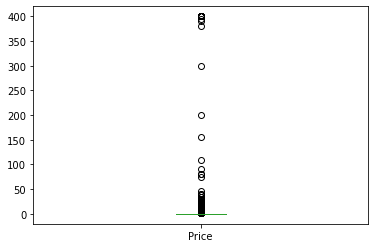

In [26]:
# Boxplot for Price

train_data.Price.plot.box()

<AxesSubplot:>

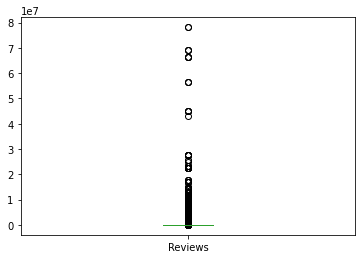

In [27]:
# Boxplot for Reviews

train_data.Reviews.plot.box()

<AxesSubplot:ylabel='Frequency'>

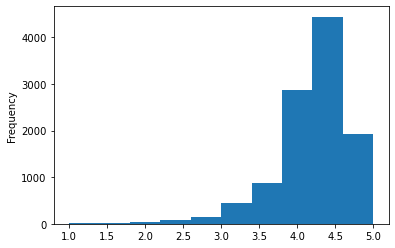

In [28]:
# Histogram for Rating

train_data.Rating.plot.hist()


<AxesSubplot:ylabel='Frequency'>

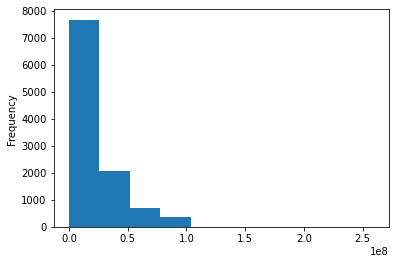

In [29]:
# Histogram for Size

train_data.Size.plot.hist()

In [30]:
# Checking out the records with very high price

print(len(train_data[train_data.Price>200]))
train_data=train_data[train_data.Price<200].copy();print(train_data.shape)


17
(10821, 9)


In [31]:
# Dropping records having more than 2 million reviews

print(len(train_data[train_data.Reviews>=2000000]))
train_data=train_data[train_data.Reviews<=2000000].copy();print(train_data.shape)

453
(10368, 9)


In [32]:
# Finding out the different percentiles – 10, 25, 50, 70, 90, 95, 99


print(train_data.Installs.quantile([.25,.50,.75,.90,.99]))
print(len(train_data[train_data.Installs>= 10000000]))
train_data=train_data[train_data.Installs<=10000000].copy();print(train_data.shape)

0.25         1000.0
0.50       100000.0
0.75      1000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
1627
(9979, 9)


[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'Reviews'}>]
 [<AxesSubplot:title={'center':'Size'}>
  <AxesSubplot:title={'center':'Installs'}>]
 [<AxesSubplot:title={'center':'Price'}> <AxesSubplot:>]]


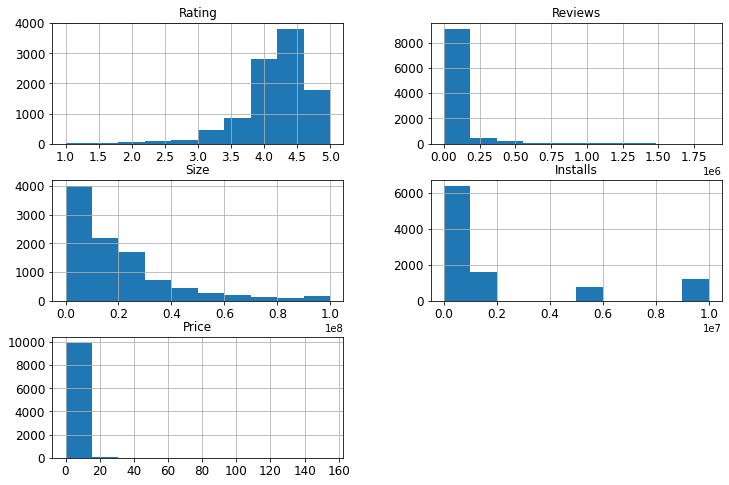

In [33]:
#It seems from the histogram(below) the variables has some skewness and from boxplot it is evident that it has outliers too...Lets correct it by applying log

print(train_data.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

<AxesSubplot:>

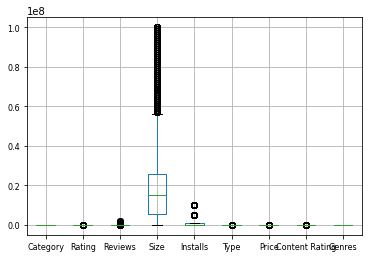

In [34]:
train_data.boxplot(fontsize=8)

In [35]:
train_data.Reviews=train_data.Reviews.apply(func=np.log1p)
train_data.Installs=train_data.Installs.apply(func=np.log1p)


array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Installs'}>]], dtype=object)

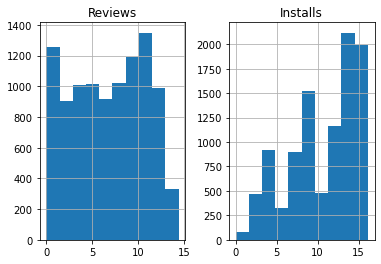

In [36]:
train_data.hist(column=['Reviews','Installs'])

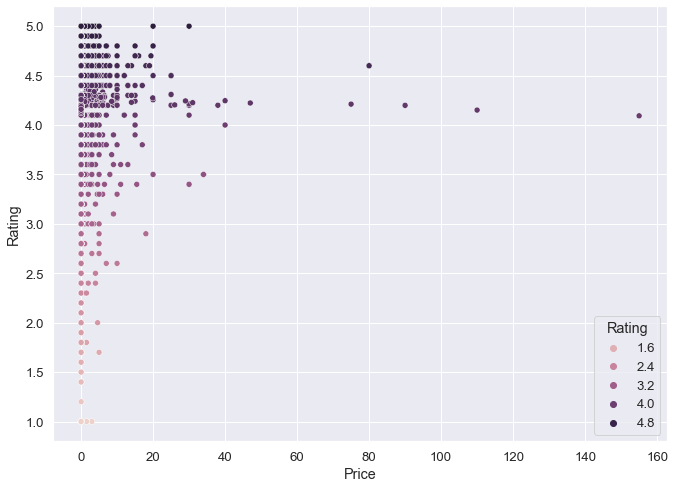

In [37]:
# Scatter plot for  Rating vs. Price

plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(train_data.Price,train_data.Rating,hue=train_data.Rating)
plt.show()

In [38]:
# While there is not a very clean pattern, it does look that the higher priced apps have better rating. 
# Although, there are not a lot of apps which are high priced, but the pattern is apparent.

<AxesSubplot:xlabel='Size', ylabel='Rating'>

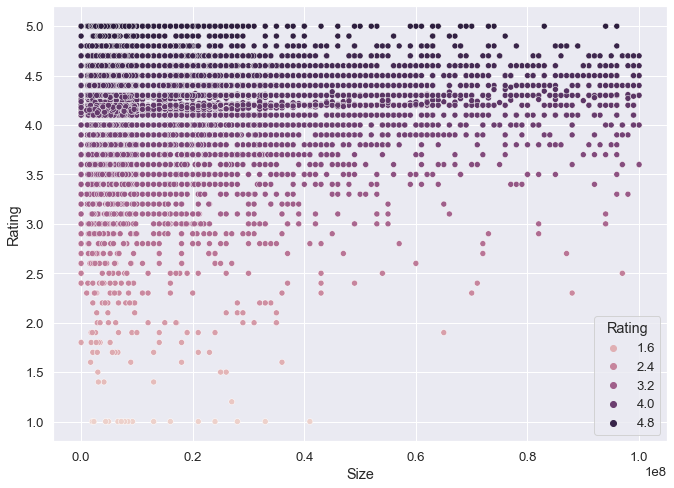

In [39]:
# Scatter plot for  Rating vs. Size

plt.figure(figsize=(11,8))
sns.scatterplot(train_data.Size,train_data.Rating,hue=train_data.Rating)

In [40]:
# Again, not a very clean pattern, but it does look like heavier apps are better rated

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

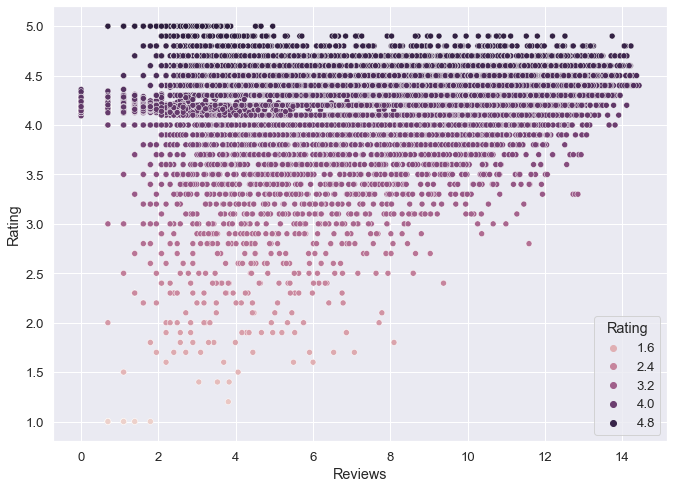

In [41]:
# Scatter plot for  Rating vs. Reviews

plt.figure(figsize=(11,8))
sns.scatterplot(train_data.Reviews,train_data.Rating,hue=train_data.Rating)

In [42]:
# No clear pattern. There are fewer low rated apps among the popular ones (maybe poor ones won’t get so popular), 
# after a certain point, the rating does not depend on the popularity.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

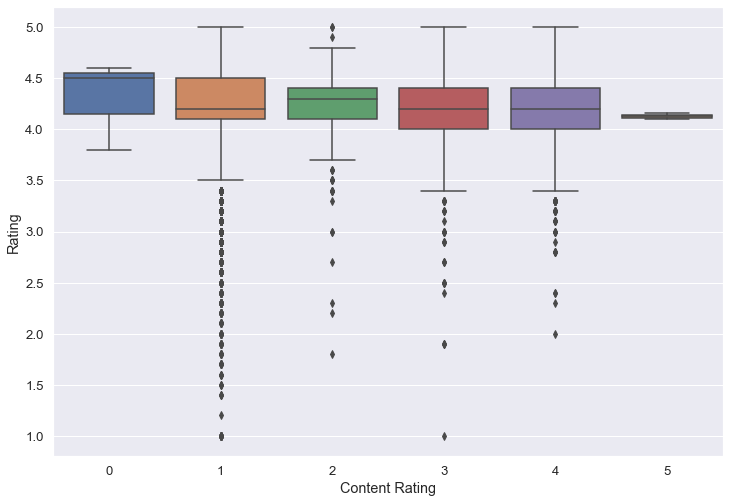

In [43]:
# Box plot for  Rating vs. Content Rating

plt.figure(figsize=(12,8.27))
sns.boxplot(train_data['Content Rating'],train_data.Rating)

In [44]:
# While the median rating for most others is similar, the rating for “Adults Only 18+” is the highest.

Text(0, 0.5, 'Rating')

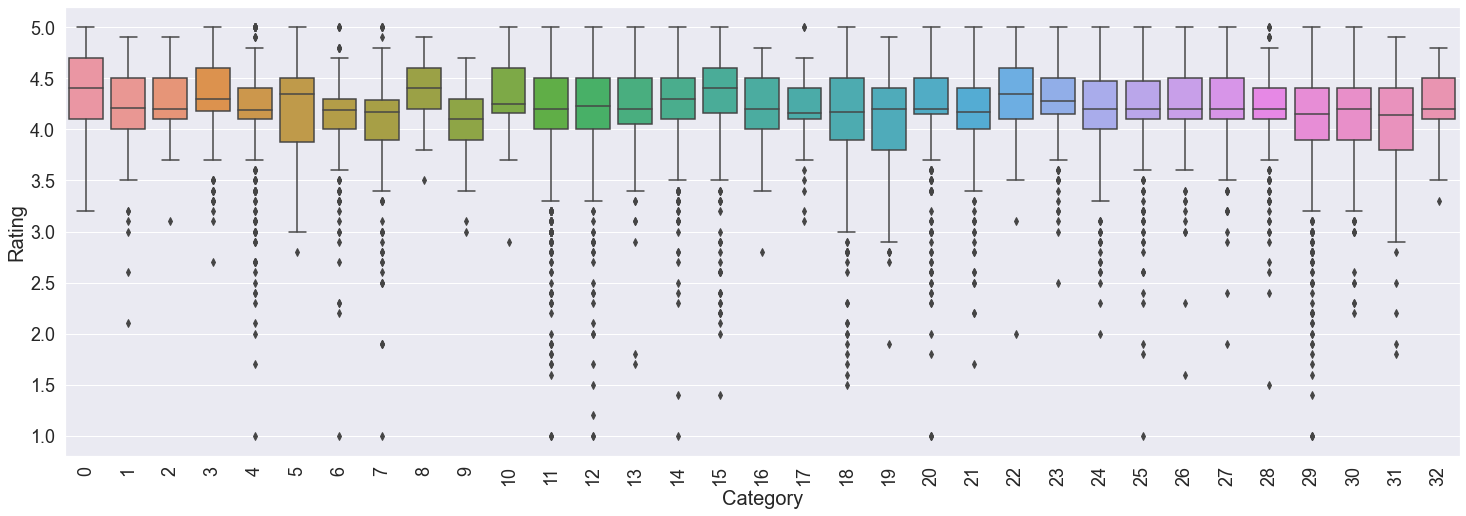

In [45]:
# Box plot for  Rating vs. Category

plt.figure(figsize=(25,8.27))
sns.boxplot(train_data.Category,train_data.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.yticks(fontsize=18)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Rating",fontsize=20)

In [46]:
# Apps around Health & Fitness, Books and Reference, Events seem to have the highest median ratings

In [47]:
# Linear Regression Models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [49]:
# Next, we split 70% of the data to the training set while 30% of the data to test set using below code.

X=train_data.iloc[:,1:]
y=train_data.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)
X_train.shape,X_test.shape

((6985, 8), (2994, 8))

In [50]:
# Building Model & Predicting the Ratings, also checking the difference between the actual value and predicted value.

Model=linreg.fit(X_train, y_train)
predict=linreg.predict(X_test)

y_test=np.array(y_test)
predict=np.array(predict)

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()});a.head(10)

,Actual,Predicted
0,30,26.148202
1,14,4.662982
2,27,24.119973
3,6,10.078189
4,11,21.701444
5,12,15.951807
6,13,15.976171
7,14,4.202024
8,20,18.372064
9,14,3.453712


<AxesSubplot:>

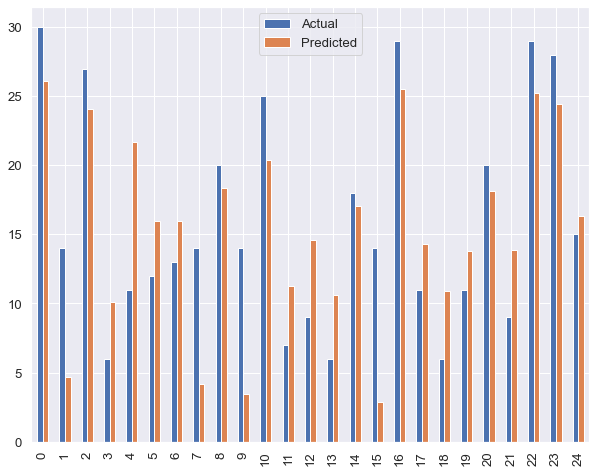

In [51]:
# In Below figure we can observe here that the model has returned pretty good prediction results.

fig=a.head(25)
fig.plot(kind='bar',figsize=(10,8))

In [52]:
# Summary

results=OLS( y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Category   R-squared (uncentered):               -1412.120
Model:                            OLS   Adj. R-squared (uncentered):          -1413.740
Method:                 Least Squares   F-statistic:                             -871.5
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        1.00
Time:                        22:46:37   Log-Likelihood:                         -21193.
No. Observations:                6985   AIC:                                  4.240e+04
Df Residuals:                    6977   BIC:                                  4.246e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Rating             0.5249      0.058      9.105      0.000       0.412       0.638
Reviews           -0.1680      0.048     -3.481      0.001      -0.263      -0.073
Size           -1.853e-08   3.17e-09     -5.849      0.000   -2.47e-08   -1.23e-08
Installs           0.2171      0.045      4.822      0.000       0.129       0.305
Type               1.1301      0.271      4.174      0.000       0.599       1.661
Price             -0.0373      0.026     -1.442      0.149      -0.088       0.013
Content Rating     0.0619      0.061      1.009      0.313      -0.058       0.182
Genres             0.2084      0.002    112.648      0.000       0.205       0.212
==============================================================================
Omnibus:                      153.833   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.534
Skew:                          -0.329   Prob(JB):                     2.08e-38
Kurtosis:                       3.405   Cond. No.                     1.30e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
print('R2_Score=',r2_score(y_test,predict))
print('Root Mean Squared Error=',np.sqrt(ms(y_test,predict)))
print('Prediction Error Percentage is',round((0.50/np.mean(y_test))*100))

R2_Score= 0.6606119641983976
Root Mean Squared Error= 4.903444102238401
Prediction Error Percentage is 3
